In [94]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import imp
import argparse
import six
import sys
import random

In [2]:
df = pd.read_csv("census_data.csv")

In [3]:
df.head()

,GEO.id,GEO.id2,GEO.display-label,HC01_EST_VC01,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,HC01_EST_VC78,HC01_MOE_VC78,HC02_EST_VC78,HC02_MOE_VC78,HC03_EST_VC78,HC03_MOE_VC78,HC04_EST_VC78,HC04_MOE_VC78,HC05_EST_VC78,HC05_MOE_VC78
0,0400000US01,1,Alabama,4791931,4065,9.0,0.3,3.2,0.2,2.3,...,6.9,(X),(X),(X),(X),(X),(X),(X),(X),(X)
1,0400000US02,2,Alaska,725206,1461,10.9,0.9,2.5,0.4,5.2,...,5.1,(X),(X),(X),(X),(X),(X),(X),(X),(X)
2,0400000US04,4,Arizona,6651964,4638,12.1,0.4,1.8,0.2,3.8,...,9.3,(X),(X),(X),(X),(X),(X),(X),(X),(X)
3,0400000US05,5,Arkansas,2931123,2667,9.5,0.4,3.6,0.3,2.5,...,5.7,(X),(X),(X),(X),(X),(X),(X),(X),(X)
4,0400000US06,6,California,38340324,10835,9.3,0.1,2.8,0.1,1.3,...,7.2,(X),(X),(X),(X),(X),(X),(X),(X),(X)


In [4]:
df.loc[:,['GEO.display-label', 'HC01_EST_VC01','HC05_EST_VC01','HC01_EST_VC03','HC05_EST_VC03','HC05_EST_VC04','HC05_EST_VC05','HC05_EST_VC06','HC05_EST_VC07']]

,GEO.display-label,HC01_EST_VC01,HC05_EST_VC01,HC01_EST_VC03,HC05_EST_VC03,HC05_EST_VC04,HC05_EST_VC05,HC05_EST_VC06,HC05_EST_VC07
0,Alabama,4791931,0.3,233714,0.2,0.2,0.7,0.4,0.3
1,Alaska,725206,0.6,41882,0.7,0.3,1.1,0.9,0.9
2,Arizona,6651964,0.7,353143,0.7,0.4,1.4,1.4,0.5
3,Arkansas,2931123,0.3,155150,0.3,0.3,0.3,0.8,0.4
4,California,38340324,0.8,2049516,0.9,0.7,1.5,1.3,0.8
5,Colorado,5293943,0.6,270135,0.8,0.5,1.2,1.1,0.6
6,Connecticut,3558915,0.8,151100,1.6,0.8,1.7,1.6,0.9
7,Delaware,924770,0.5,45166,0.3,0.1,1.2,1.2,0.1
8,District of Columbia,648586,1.8,32456,1.3,2.1,3.5,2.1,2.1
9,Florida,19683763,1.0,868038,1.1,0.9,1.4,1.5,1.2


In [5]:
df['Moved_Est_1_yr'] = df['HC01_EST_VC01']*df['HC05_MOE_VC01']*0.01
df['Moved_Est_1_4_yr'] = df['HC01_EST_VC03']*df['HC05_MOE_VC03']*0.01
df['Moved_Est_5_17_yr'] = df['HC01_EST_VC04']*df['HC05_MOE_VC04']*0.01
df['Moved_Est_18_24_yr'] = df['HC01_EST_VC05']*df['HC05_MOE_VC05']*0.01
df['Moved_Est_25_34_yr'] = df['HC01_EST_VC06']*df['HC05_MOE_VC06']*0.01
df['Moved_Est_35_44_yr'] = df['HC01_EST_VC07']*df['HC05_MOE_VC07']*0.01
df['Moved_Est_45_54_yr'] = df['HC01_EST_VC08']*df['HC05_MOE_VC08']*0.01
df['Moved_Est_55_64_yr'] = df['HC01_EST_VC09']*df['HC05_MOE_VC09']*0.01
df['Moved_Est_65_74_yr'] = df['HC01_EST_VC10']*df['HC05_MOE_VC10']*0.01
df['Moved_Est_75_yr'] = df['HC01_EST_VC11']*df['HC05_MOE_VC11']*0.01

In [6]:
df.head()
df.rename(columns={'HC01_EST_VC01':'Total_Est_1_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC03':'Total_Est_1_4_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC04':'Total_Est_5_17_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC05':'Total_Est_18_24_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC06':'Total_Est_25_34_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC07':'Total_Est_35_44_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC08':'Total_Est_45_54_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC09':'Total_Est_55_64_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC10':'Total_Est_65_74_yr'}, inplace=True)
df.rename(columns={'HC01_EST_VC11':'Total_Est_75_A_yr'}, inplace=True)

#df.loc[:,['GEO.display-label', 'HC01_EST_VC01','HC05_EST_VC01','HC01_EST_VC03','HC05_EST_VC03','HC05_EST_VC04','HC05_EST_VC05','HC05_EST_VC06','HC05_EST_VC07']]

In [7]:
df.head()

,GEO.id,GEO.id2,GEO.display-label,Total_Est_1_yr,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,Moved_Est_1_yr,Moved_Est_1_4_yr,Moved_Est_5_17_yr,Moved_Est_18_24_yr,Moved_Est_25_34_yr,Moved_Est_35_44_yr,Moved_Est_45_54_yr,Moved_Est_55_64_yr,Moved_Est_65_74_yr,Moved_Est_75_yr
0,0400000US01,1,Alabama,4791931,4065,9.0,0.3,3.2,0.2,2.3,...,4791.931,467.428,817.440,968.022,615.948,613.234,651.204,629.868,434.244,312.268
1,0400000US02,2,Alaska,725206,1461,10.9,0.9,2.5,0.4,5.2,...,1450.412,251.292,266.722,593.698,682.644,744.664,289.083,184.064,46.227,71.016
2,0400000US04,4,Arizona,6651964,4638,12.1,0.4,1.8,0.2,3.8,...,6651.964,1412.572,1189.408,1346.374,2686.557,839.439,1673.078,793.972,1245.032,448.241
3,0400000US05,5,Arkansas,2931123,2667,9.5,0.4,3.6,0.3,2.5,...,2931.123,620.600,1031.488,291.815,1134.927,749.134,380.913,369.613,268.763,196.249
4,0400000US06,6,California,38340324,10835,9.3,0.1,2.8,0.1,1.3,...,38340.324,2049.516,6639.887,3996.629,5722.924,5184.418,5235.948,4520.910,2836.598,2153.494


In [8]:
df.loc[:,['HC05_MOE_VC01','Total_Est_1_yr', 'Moved_Est_1_yr','HC05_MOE_VC03','Total_Est_1_4_yr','Moved_Est_1_4_yr','HC05_MOE_VC04','Total_Est_5_17_yr','Total_Est_18_24_yr', 'Total_Est_25_34_yr','Total_Est_45_54_yr', 'Total_Est_55_64_yr']]

,HC05_MOE_VC01,Total_Est_1_yr,Moved_Est_1_yr,HC05_MOE_VC03,Total_Est_1_4_yr,Moved_Est_1_4_yr,HC05_MOE_VC04,Total_Est_5_17_yr,Total_Est_18_24_yr,Total_Est_25_34_yr,Total_Est_45_54_yr,Total_Est_55_64_yr
0,0.1,4791931,4791.931,0.2,233714,467.428,0.1,817440,484011,615948,651204,629868
1,0.2,725206,1450.412,0.6,41882,251.292,0.2,133361,84814,113774,96361,92032
2,0.1,6651964,6651.964,0.4,353143,1412.572,0.1,1189408,673187,895519,836539,793972
3,0.1,2931123,2931.123,0.4,155150,620.600,0.2,515744,291815,378309,380913,369613
4,0.1,38340324,38340.324,0.1,2049516,2049.516,0.1,6639887,3996629,5722924,5235948,4520910
5,0.1,5293943,5293.943,0.3,270135,810.405,0.2,915087,524258,798685,711280,670140
6,0.1,3558915,3558.915,0.7,151100,1057.700,0.3,586014,349983,438421,549077,487371
7,0.1,924770,924.770,0.5,45166,225.830,0.1,147832,91429,121964,128366,124633
8,0.3,648586,1945.758,1.1,32456,357.016,1.2,72267,80652,150211,76790,68868
9,0.1,19683763,19683.763,0.3,868038,2604.114,0.1,2976451,1798078,2512629,2730745,2574259


In [9]:
df.head()

,GEO.id,GEO.id2,GEO.display-label,Total_Est_1_yr,HC01_MOE_VC01,HC02_EST_VC01,HC02_MOE_VC01,HC03_EST_VC01,HC03_MOE_VC01,HC04_EST_VC01,...,Moved_Est_1_yr,Moved_Est_1_4_yr,Moved_Est_5_17_yr,Moved_Est_18_24_yr,Moved_Est_25_34_yr,Moved_Est_35_44_yr,Moved_Est_45_54_yr,Moved_Est_55_64_yr,Moved_Est_65_74_yr,Moved_Est_75_yr
0,0400000US01,1,Alabama,4791931,4065,9.0,0.3,3.2,0.2,2.3,...,4791.931,467.428,817.440,968.022,615.948,613.234,651.204,629.868,434.244,312.268
1,0400000US02,2,Alaska,725206,1461,10.9,0.9,2.5,0.4,5.2,...,1450.412,251.292,266.722,593.698,682.644,744.664,289.083,184.064,46.227,71.016
2,0400000US04,4,Arizona,6651964,4638,12.1,0.4,1.8,0.2,3.8,...,6651.964,1412.572,1189.408,1346.374,2686.557,839.439,1673.078,793.972,1245.032,448.241
3,0400000US05,5,Arkansas,2931123,2667,9.5,0.4,3.6,0.3,2.5,...,2931.123,620.600,1031.488,291.815,1134.927,749.134,380.913,369.613,268.763,196.249
4,0400000US06,6,California,38340324,10835,9.3,0.1,2.8,0.1,1.3,...,38340.324,2049.516,6639.887,3996.629,5722.924,5184.418,5235.948,4520.910,2836.598,2153.494


In [23]:
df_final = df.loc[:,['GEO.display-label', 'HC01_EST_VC01', 'Total_Est_1_yr', 'Moved_Est_1_yr','Total_Est_1_4_yr','Moved_Est_1_4_yr','Total_Est_5_17_yr', 'Moved_Est_5_17_yr','Total_Est_18_24_yr','Moved_Est_18_24_yr' , 'Total_Est_25_34_yr',  'Moved_Est_25_34_yr' , 'Total_Est_35_44_yr' , 'Moved_Est_35_44_yr', 'Total_Est_45_54_yr','Moved_Est_45_54_yr' , 'Total_Est_55_64_yr','Moved_Est_55_64_yr']]

In [24]:
df_final.head()

,GEO.display-label,HC01_EST_VC01,Total_Est_1_yr,Moved_Est_1_yr,Total_Est_1_4_yr,Moved_Est_1_4_yr,Total_Est_5_17_yr,Moved_Est_5_17_yr,Total_Est_18_24_yr,Moved_Est_18_24_yr,Total_Est_25_34_yr,Moved_Est_25_34_yr,Total_Est_35_44_yr,Moved_Est_35_44_yr,Total_Est_45_54_yr,Moved_Est_45_54_yr,Total_Est_55_64_yr,Moved_Est_55_64_yr
0,Alabama,NaN,4791931,4791.931,233714,467.428,817440,817.440,484011,968.022,615948,615.948,613234,613.234,651204,651.204,629868,629.868
1,Alaska,NaN,725206,1450.412,41882,251.292,133361,266.722,84814,593.698,113774,682.644,93083,744.664,96361,289.083,92032,184.064
2,Arizona,NaN,6651964,6651.964,353143,1412.572,1189408,1189.408,673187,1346.374,895519,2686.557,839439,839.439,836539,1673.078,793972,793.972
3,Arkansas,NaN,2931123,2931.123,155150,620.600,515744,1031.488,291815,291.815,378309,1134.927,374567,749.134,380913,380.913,369613,369.613
4,California,NaN,38340324,38340.324,2049516,2049.516,6639887,6639.887,3996629,3996.629,5722924,5722.924,5184418,5184.418,5235948,5235.948,4520910,4520.910


In [38]:
df_final['WorkingBasePopulation'] = (df_final['Total_Est_18_24_yr']+df_final['Total_Est_25_34_yr'] +df_final['Total_Est_35_44_yr'] + df_final['Total_Est_45_54_yr'])

In [39]:
df_final['NonWorkingBasePopulation'] = (df_final['Total_Est_1_yr']+df_final['Total_Est_1_4_yr'] +df_final['Total_Est_5_17_yr'] + df_final['Total_Est_55_64_yr'])

In [40]:
df_final['WorkingImmPopulation'] = df_final['Moved_Est_18_24_yr']+df_final['Moved_Est_25_34_yr'] +df_final['Moved_Est_35_44_yr'] + df_final['Moved_Est_45_54_yr']

In [41]:
df_final['NonWorkingImmPopulation'] =  (df_final['Moved_Est_1_yr']+df_final['Moved_Est_1_4_yr'] +df_final['Moved_Est_5_17_yr'] + df_final['Moved_Est_55_64_yr'])

In [45]:
df_final['BaseWorkNonWorkRatio'] = (df_final['WorkingBasePopulation']/df_final['NonWorkingBasePopulation'])

In [46]:
df_final['ImmWorkNonWorkRatio'] = (df_final['WorkingImmPopulation']/df_final['NonWorkingImmPopulation'])

In [47]:
df_final.head()

,GEO.display-label,HC01_EST_VC01,Total_Est_1_yr,Moved_Est_1_yr,Total_Est_1_4_yr,Moved_Est_1_4_yr,Total_Est_5_17_yr,Moved_Est_5_17_yr,Total_Est_18_24_yr,Moved_Est_18_24_yr,...,Total_Est_55_64_yr,Moved_Est_55_64_yr,WorkingBasePopulation,WorkingBasePopulationRatio,NonWorkingBasePopulationRatio,WorkingImmPopulation,NonWorkingImmPopulation,NonWorkingBasePopulation,BaseWorkNonWorkRatio,ImmWorkNonWorkRatio
0,Alabama,NaN,4791931,4791.931,233714,467.428,817440,817.440,484011,968.022,...,629868,629.868,2364397,2364397,6472953,2848.408,6706.667,6472953,0.365273,0.424713
1,Alaska,NaN,725206,1450.412,41882,251.292,133361,266.722,84814,593.698,...,92032,184.064,388032,388032,992481,2310.089,2152.490,992481,0.390972,1.073217
2,Arizona,NaN,6651964,6651.964,353143,1412.572,1189408,1189.408,673187,1346.374,...,793972,793.972,3244684,3244684,8988487,6545.448,10047.916,8988487,0.360982,0.651423
3,Arkansas,NaN,2931123,2931.123,155150,620.600,515744,1031.488,291815,291.815,...,369613,369.613,1425604,1425604,3971630,2556.789,4952.824,3971630,0.358947,0.516229
4,California,NaN,38340324,38340.324,2049516,2049.516,6639887,6639.887,3996629,3996.629,...,4520910,4520.910,20139919,20139919,51550637,20139.919,51550.637,51550637,0.390682,0.390682


In [95]:
imm_states = df_final['GEO.display-label'].tolist()

In [96]:
x_axis = df_final.index.tolist()

In [97]:
print(str(x_axis))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [98]:
y_axis = df_final['BaseWorkNonWorkRatio'].tolist()

In [139]:
print(str(y_axis))

[0.36527331497695104, 0.3909717163351238, 0.36098222092327664, 0.35894683039457354, 0.39068225286915464, 0.3859128964283941, 0.3718907053560229, 0.36492243647582384, 0.4871578747641931, 0.3629559240488396, 0.38337312779109195, 0.3754588297030412, 0.3458294076411742, 0.37731647219337366, 0.36497268670108546, 0.35666606825584396, 0.35806296673845783, 0.36751323776171707, 0.37122709169731793, 0.35206753353310705, 0.3815633622369465, 0.3888774158503293, 0.36112525057244094, 0.36713415299866115, 0.3627006586796759, 0.3635452942543699, 0.3472821983940313, 0.3585651328596044, 0.37831227802005124, 0.3687819992171999, 0.37440730318351345, 0.3556490785716934, 0.38873858832082336, 0.3739280595565533, 0.3820042630875769, 0.3591955649383359, 0.363222066759944, 0.36602491857558633, 0.3642393005015496, 0.38406756060863234, 0.3656874961491885, 0.34837289652516884, 0.36959471208798156, 0.37964808898475183, 0.36347892437278495, 0.3619278663820771, 0.38744974763191836, 0.3777348221455127, 0.3524840096619

In [140]:
imm_axis = df_final['ImmWorkNonWorkRatio'].tolist()

In [141]:
plt.bar(x_axis, imm_axis, color='b', alpha=1.0, align="edge")

<Container object of 51 artists>

In [142]:
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="edge")

<Container object of 51 artists>

In [143]:
plt.xticks(x_axis, imm_states)


([<matplotlib.axis.XTick at 0x200dbb324e0>,
 <a list of 51 Text xticklabel objects>)

In [149]:
for label in plt.:
    # label is a Text instance
    label.set_color('red')
    label.set_rotation(45)
    label.set_fontsize(16)

TypeError: 'function' object is not iterable

In [145]:
# Set the limits of the x axis
plt.xlim(0, len(x_axis))

(0, 51)

In [146]:
# The y limits of our scatter plot is 0 to 1
plt.ylim(0, max(imm_axis))

(0, 1.1854881726132482)

In [147]:
# Give the chart a title, x label, and y label
# Give our chart some labels and a tile
plt.title("Survey of Working/Non Working Base Population per state")
plt.xlabel("States in Survey")
plt.ylabel("Ratio of Working to Non Working")
#fig = plt.figure(figsize=(5,4))

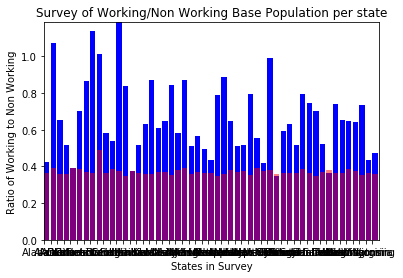

In [148]:
plt.show()

In [136]:
df_final.to_json("data/final.json")

In [152]:
df_final.head()

,GEO.display-label,HC01_EST_VC01,Total_Est_1_yr,Moved_Est_1_yr,Total_Est_1_4_yr,Moved_Est_1_4_yr,Total_Est_5_17_yr,Moved_Est_5_17_yr,Total_Est_18_24_yr,Moved_Est_18_24_yr,...,Total_Est_55_64_yr,Moved_Est_55_64_yr,WorkingBasePopulation,WorkingBasePopulationRatio,NonWorkingBasePopulationRatio,WorkingImmPopulation,NonWorkingImmPopulation,NonWorkingBasePopulation,BaseWorkNonWorkRatio,ImmWorkNonWorkRatio
0,Alabama,NaN,4791931,4791.931,233714,467.428,817440,817.440,484011,968.022,...,629868,629.868,2364397,2364397,6472953,2848.408,6706.667,6472953,0.365273,0.424713
1,Alaska,NaN,725206,1450.412,41882,251.292,133361,266.722,84814,593.698,...,92032,184.064,388032,388032,992481,2310.089,2152.490,992481,0.390972,1.073217
2,Arizona,NaN,6651964,6651.964,353143,1412.572,1189408,1189.408,673187,1346.374,...,793972,793.972,3244684,3244684,8988487,6545.448,10047.916,8988487,0.360982,0.651423
3,Arkansas,NaN,2931123,2931.123,155150,620.600,515744,1031.488,291815,291.815,...,369613,369.613,1425604,1425604,3971630,2556.789,4952.824,3971630,0.358947,0.516229
4,California,NaN,38340324,38340.324,2049516,2049.516,6639887,6639.887,3996629,3996.629,...,4520910,4520.910,20139919,20139919,51550637,20139.919,51550.637,51550637,0.390682,0.390682


In [153]:
df_stats = df_final.loc[:,['GEO.display-label', 'WorkingBasePopulation','WorkingBasePopulationRatio','NonWorkingBasePopulationRatio','WorkingImmPopulation','NonWorkingImmPopulation','NonWorkingBasePopulation','BaseWorkNonWorkRatio','ImmWorkNonWorkRatio']]

In [155]:
df_stats.to_csv("data/state_imm_stat.csv")

In [21]:
df_final.plot

In [22]:
plt.show

<function matplotlib.pyplot.show>